In [ ]:
%pip install copulas==0.8.0

In [3]:
!gdown 1LK03a5IbPiV6RosdTR15gjZpLIg3YnBl

Downloading...
From: https://drive.google.com/uc?id=1LK03a5IbPiV6RosdTR15gjZpLIg3YnBl
To: /content/TrainDataset2023.xls
100% 867k/867k [00:00<00:00, 33.6MB/s]


In [50]:
import pandas as pd
import copulas
from copulas.datasets import sample_trivariate_xyz
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE # TSNE module
from sklearn.decomposition import PCA

df = pd.read_excel('/content/TrainDataset2023.xls')
df.drop(['ID', 'RelapseFreeSurvival (outcome)'], axis=1, inplace = True)

df.drop(df[df['pCR (outcome)'] > 1].index, inplace=True)
df.drop(df[df['original_shape_Elongation'] == 999].index, inplace=True)
df.drop(df[df['original_shape_Flatness'] == 999].index, inplace=True)
df.drop(df[df['original_shape_LeastAxisLength'] == 999].index, inplace=True)
df.drop(df[df['original_shape_MajorAxisLength'] == 999].index, inplace=True)
# df.drop(df[df['original_shape_Maximum2DDiameterColumn'] == 999].index, inplace=True)
# df.drop(df[df['original_shape_Maximum2DDiameterRow'] == 999].index, inplace=True)
# df.drop(df[df['original_shape_Maximum2DDiameterSlice'] == 999].index, inplace=True)
# df.drop(df[df['original_shape_Maximum3DDiameter'] == 999].index, inplace=True)
# df.drop(df[df['original_shape_MeshVolume'] == 999].index, inplace=True)

dff = df[df.columns[11:15]].reset_index(drop=True)

In [51]:
dff.insert(4, 'pCR (outcome)', df['pCR (outcome)'].values.tolist())
dff

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,pCR (outcome)
0,0.813912,0.724080,23.781937,32.844370,1
1,0.666118,0.476173,20.715461,43.504095,0
2,0.645083,0.594470,21.659822,36.435505,1
3,0.770842,0.501228,26.590504,53.050724,0
4,0.861035,0.750267,20.456571,27.265716,0
...,...,...,...,...,...
390,0.389439,0.270888,13.993705,51.658584,0
391,0.915643,0.726601,18.563747,25.548740,0
392,0.657236,0.447210,8.413409,18.813092,0
393,0.890276,0.837452,31.501627,37.616059,0


In [41]:
# sns.set_theme(style="white")

# # Compute the correlation matrix
# corr = df.corr()

# # Generate a mask for the upper triangle
# mask = np.triu(np.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .4})

<Axes: xlabel='pCR (outcome)', ylabel='count'>

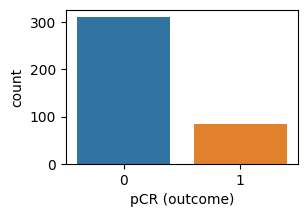

In [52]:
plt.figure(figsize = (3, 2))

dff['pCR (outcome)'].value_counts() # Not Balanced
sns.countplot(x="pCR (outcome)", data=df)

In [53]:
def normalize_data(data):
  """Normalizes data using a lambda function."""

  # subtract the mean and divide by the standard deviation
  return (data - data.mean()) / data.std()

def to_list_normalization(data1):
    data2 = data1[list(df.columns[11:15])]
    data2 = data2.apply(normalize_data, axis=0)

    return data2.iloc[0:]

DF_reduc = dff.drop('pCR (outcome)', axis=1)
DF_reduc = to_list_normalization(DF_reduc)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 395 samples in 0.001s...
[t-SNE] Computed neighbors for 395 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 395 / 395
[t-SNE] Mean sigma: 0.536379
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.289734
[t-SNE] KL divergence after 1000 iterations: 0.413534


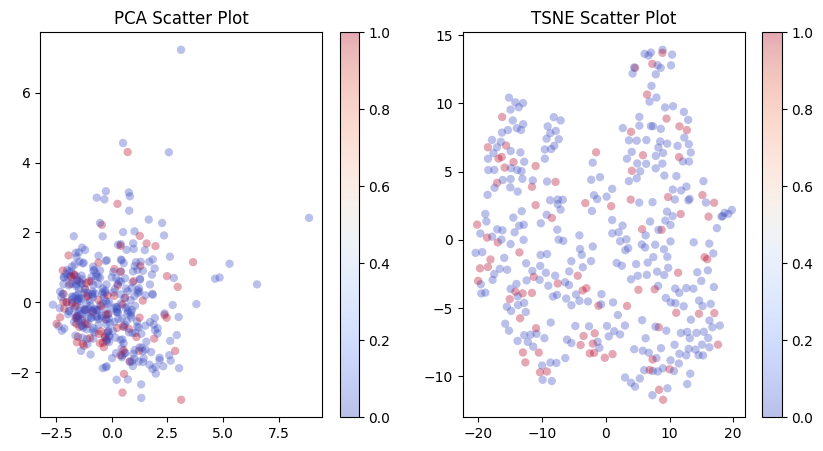

In [54]:
X = DF_reduc.values
Labels = dff['pCR (outcome)']

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X)

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = Labels,
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')

plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = Labels,
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()

In [ ]:
from copulas.visualization import scatter_3d
from copulas.multivariate import GaussianMultivariate
# scatter_3d(df)

# Train our gaussian copula
copula = GaussianMultivariate()
copula.fit(df)

In [56]:
synthetic_data = copula.sample(num_rows=1000)
synthetic_data.head()

,pCR (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,-0.257336,43.855639,1.118678,6.567098e-16,-1.202294e-27,3.304766e-20,2.690681,20.892097,-1.583490,1.239398,...,0.386633,0.332967,3.410377,0.001142,5.368360e+06,223.461950,0.001276,0.033646,0.000950,0.001771
1,-0.028061,65.396964,1.101117,2.570512e-05,-1.202294e-27,-1.639641e-28,2.569813,5.540518,-19.115237,0.613917,...,0.612476,0.595430,3.690136,0.000698,6.018873e+07,589.085583,-4.871366,0.114145,0.005286,0.000345
2,0.958512,39.019755,0.087222,1.124580e-22,1.402305e-19,4.740326e-01,2.441520,1.006196,6.499356,0.842305,...,0.760292,0.756605,1.119756,0.003593,2.873479e+08,100.329580,0.002628,0.028693,0.000192,0.174287
3,0.968359,42.015798,-0.152548,-5.060416e-28,7.914035e+01,1.781608e-06,3.032963,1.380177,33.627705,0.813491,...,0.229856,0.309456,3.006915,0.001174,2.648146e+08,561.712586,0.000137,0.140879,0.006308,0.153287
4,-0.071373,42.135772,0.862267,3.786603e-25,1.157408e-06,-4.384045e-28,2.254185,1.000013,28.950796,0.255519,...,0.568029,0.578684,3.597713,0.006759,1.652352e+07,733.270844,-0.118400,0.177631,0.008578,0.016839


In [57]:
synthetic_dataa = synthetic_data[abs(1 - synthetic_data['pCR (outcome)']) <= 0.2]
synthetic_dataa = synthetic_dataa.reset_index(drop=True)
synthetic_dataa['pCR (outcome)'] = synthetic_dataa['pCR (outcome)'].apply(lambda x: 1)

In [58]:
df_upsampling = pd.concat([df, synthetic_dataa])
df_upsampling.head()

,pCR (outcome),Age,ER,PgR,HER2,TrippleNegative,ChemoGrade,Proliferation,HistologyType,LNStatus,...,original_glszm_SmallAreaHighGrayLevelEmphasis,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,1,41.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,...,0.517172,0.375126,3.325332,0.002314,3880771.500,473.464852,0.000768,0.182615,0.030508,0.000758
1,0,39.0,1.0,1.0,0.0,0.0,3.0,3.0,1.0,1.0,...,0.444391,0.444391,3.032144,0.005612,2372009.744,59.459710,0.004383,0.032012,0.001006,0.003685
2,1,31.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,...,0.534549,0.534549,2.485848,0.006752,1540027.421,33.935384,0.007584,0.024062,0.000529,0.006447
3,0,35.0,0.0,0.0,0.0,1.0,3.0,3.0,1.0,1.0,...,0.506185,0.506185,2.606255,0.003755,6936740.794,46.859265,0.005424,0.013707,0.000178,0.004543
4,0,61.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,...,0.462282,0.462282,2.809279,0.006521,1265399.054,39.621023,0.006585,0.034148,0.001083,0.005626


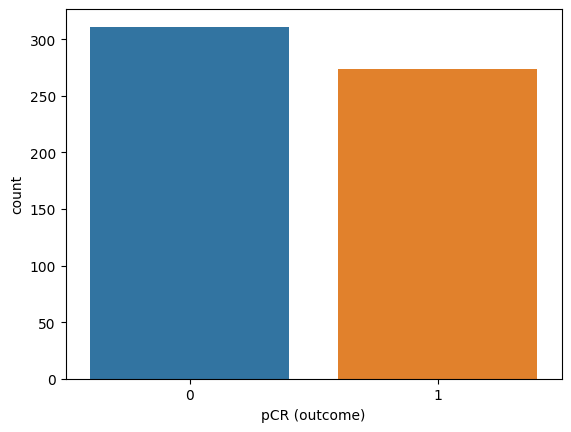

In [59]:
df_upsampling['pCR (outcome)'].value_counts() # Not Balanced
sns.countplot(x="pCR (outcome)", data=df_upsampling)


df_tsne = df_upsampling.drop('pCR (outcome)', axis=1)

In [60]:
# Turn dataframe into arrays
DF_reduc = df_upsampling.drop('pCR (outcome)', axis=1)
DF_reduc = to_list_normalization(DF_reduc)

X = DF_reduc.values

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

# Invoke the TSNE method
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(X)

Labels = df_upsampling['pCR (outcome)']

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 585 samples in 0.002s...
[t-SNE] Computed neighbors for 585 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 585 / 585
[t-SNE] Mean sigma: 0.456223
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.517063
[t-SNE] KL divergence after 1000 iterations: 0.510846


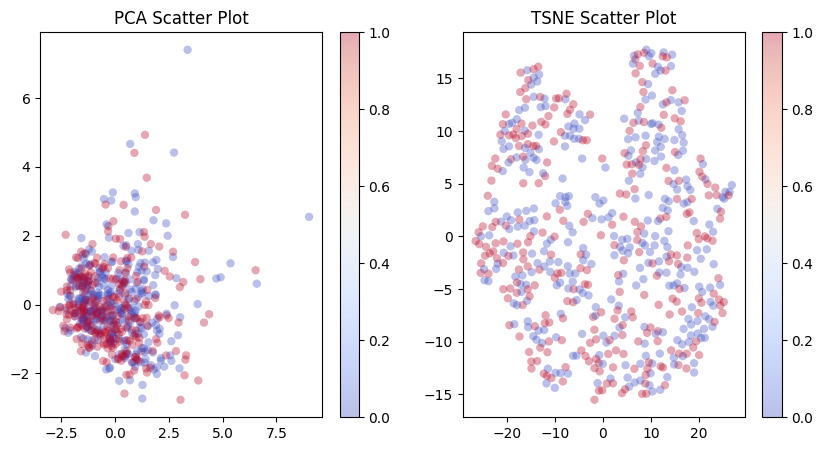

In [61]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize = (10,5))
plt.subplot(121)
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = Labels,
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot')

plt.subplot(122)
plt.scatter(tsne_results[:,0],tsne_results[:,1],  c = Labels,
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot')
plt.show()